# Project 2 - Naive Bayes and Logistic Regression
### Damian Franco
### Meiling Traeger

This project demonstrates a various machine learning models for text classification through linear regression and naive bayes models. There are three main sections (Reading in data sets, naive bayes and logistic regression) with many cells in each session, but there is some order within the chaos below.

In [7]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sbs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from google.colab import files
import os 
import sklearn as ski
import math
import scipy.stats as stats
from pprint import pprint
import dask
import dask.dataframe as dd
import dask.array as da
import dask.bag as db
import pickle
import csv
from collections import defaultdict
import json
import joblib

In [8]:
# Comment in if wanting to load data directly from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Create and load data

## References:
* https://towardsdatascience.com/working-with-sparse-data-sets-in-pandas-and-sklearn-d26c1cfbe067
* https://www.analyticsvidhya.com/blog/2022/10/dealing-with-sparse-datasets-in-machine-learning/
* https://www.projectpro.io/recipes/reduce-dimentionality-on-sparse-matrix-in-python
* https://www.machinelearningplus.com/python/how-to-deal-with-big-data-in-python/
* https://www.dask.org/
* https://www.machinelearningplus.com/python/dask-tutorial/
* https://towardsdatascience.com/loading-large-datasets-in-pandas-11bdddd36f7b



### Loading in vocab list

In [9]:
all_vocab = []
with open("drive/My Drive/machineLearning/newsText/vocabulary.txt", "r") as vocab_list:
	vocab_lines = vocab_list.readlines()

for l in vocab_lines:
  asvocab_list = l.split("\n")
  all_vocab.append(asvocab_list[0])

print(all_vocab)

['archive', 'name', 'atheism', 'resources', 'alt', 'last', 'modified', 'december', 'version', 'atheist', 'addresses', 'of', 'organizations', 'usa', 'freedom', 'from', 'religion', 'foundation', 'darwin', 'fish', 'bumper', 'stickers', 'and', 'assorted', 'other', 'paraphernalia', 'are', 'available', 'the', 'in', 'us', 'write', 'to', 'ffrf', 'box', 'madison', 'wi', 'telephone', 'evolution', 'designs', 'sell', 'it', 'symbol', 'like', 'ones', 'christians', 'stick', 'on', 'their', 'cars', 'but', 'with', 'feet', 'word', 'written', 'inside', 'deluxe', 'moulded', 'plastic', 'is', 'postpaid', 'laurel', 'canyon', 'north', 'hollywood', 'ca', 'people', 'san', 'francisco', 'bay', 'area', 'can', 'get', 'lynn', 'gold', 'try', 'mailing', 'figmo', 'netcom', 'com', 'for', 'net', 'who', 'go', 'directly', 'price', 'per', 'american', 'press', 'aap', 'publish', 'various', 'books', 'critiques', 'bible', 'lists', 'biblical', 'contradictions', 'so', 'one', 'such', 'book', 'handbook', 'by', 'ball', 'foote', 'pp',

In [6]:
print(len(all_vocab))

0


### Loading in group labels set

In [ ]:
all_grouplabels = pd.read_csv('drive/My Drive/machineLearning/newsText/newsgrouplabels.txt', sep=" ", header=None)

In [ ]:
all_grouplabels.head()

0                         1
0  1               alt.atheism
1  2             comp.graphics
2  3   comp.os.ms-windows.misc
3  4  comp.sys.ibm.pc.hardware
4  5     comp.sys.mac.hardware

In [ ]:
print(all_grouplabels.shape[0])

20


### Loading in training classes

In [ ]:
train_classes = []
with open("drive/My Drive/machineLearning/newsText/all_classesTRAIN.txt", "r") as classes_list:
	classes_lines = classes_list.readlines()

for l in classes_lines:
  asclasses_list = l.split("\n")
  train_classes.append(int(asclasses_list[0]))

print(train_classes)

[16, 8, 11, 12, 7, 15, 6, 5, 5, 16, 4, 6, 1, 2, 7, 4, 17, 8, 4, 16, 3, 12, 7, 17, 19, 8, 6, 9, 16, 14, 19, 13, 12, 3, 6, 1, 3, 4, 6, 8, 10, 4, 5, 2, 5, 20, 9, 12, 13, 2, 7, 5, 7, 6, 17, 12, 14, 5, 14, 11, 7, 1, 6, 1, 12, 2, 12, 4, 3, 17, 3, 6, 16, 3, 10, 12, 12, 17, 1, 5, 4, 17, 11, 7, 8, 20, 17, 11, 16, 16, 6, 13, 9, 13, 2, 15, 7, 3, 6, 16, 15, 14, 16, 6, 18, 20, 18, 13, 10, 8, 10, 3, 7, 15, 3, 1, 10, 16, 11, 2, 13, 5, 4, 7, 20, 13, 18, 8, 6, 7, 12, 4, 5, 17, 3, 12, 3, 20, 15, 3, 10, 9, 16, 17, 11, 16, 4, 13, 16, 12, 14, 1, 5, 18, 6, 5, 8, 3, 2, 17, 7, 8, 3, 6, 16, 16, 13, 2, 18, 7, 10, 10, 11, 1, 14, 20, 15, 12, 10, 16, 9, 8, 1, 18, 4, 19, 5, 11, 6, 15, 20, 7, 12, 16, 16, 19, 6, 16, 19, 9, 14, 4, 2, 13, 2, 4, 5, 4, 18, 12, 6, 7, 12, 10, 16, 9, 8, 13, 8, 16, 12, 14, 14, 15, 2, 8, 8, 4, 19, 14, 6, 18, 20, 4, 1, 16, 19, 12, 5, 14, 15, 4, 18, 3, 7, 10, 3, 9, 6, 20, 12, 19, 17, 18, 17, 3, 13, 13, 14, 17, 16, 2, 13, 3, 14, 3, 13, 15, 8, 10, 13, 15, 4, 2, 10, 11, 10, 18, 6, 1, 1, 13, 5, 3, 

In [ ]:
train_classes = np.array(train_classes)

In [ ]:
train_classes

array([16,  8, 11, ..., 11,  7,  6])

### Load "small" training set

In [ ]:
df_trainSMALL = pd.read_csv("drive/My Drive/machineLearning/newsText/trainingSMALL.csv")

In [ ]:
df_trainSMALL.head()

1  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.61069  0.61070  \
0  2  0    0    0    0    0    0    0    0    0  ...        0        0   
1  3  0    0    0    0    0    0    0    0    0  ...        0        0   
2  4  0    0    0    0    0    0    0    0    0  ...        0        0   
3  5  0    0    0    0    0    0    0    0    0  ...        0        0   
4  6  0    0    0    0    0    0    0    0    0  ...        0        0   

   0.61071  0.61072  0.61073  0.61074  0.61075  0.61076  0.61077  14  
0        0        0        0        0        0        0        0  16  
1        0        0        0        0        0        0        0   8  
2        0        0        0        0        0        0        0  11  
3        0        0        0        0        0        0        0  12  
4        0        0        0        0        0        0        0   7  

[5 rows x 61190 columns]

In [ ]:
df_trainSMALL['14'].head()

0    16
1     8
2    11
3    12
4     7
Name: 14, dtype: int64

In [ ]:
df_trainSMALL['14'].value_counts()

16    95
11    90
4     84
13    84
6     83
12    81
15    79
8     79
10    77
14    77
3     76
7     76
2     72
5     71
17    69
9     67
18    67
1     65
19    58
20    49
Name: 14, dtype: int64

### Load "small" testing set

In [ ]:
df_testSMALL = pd.read_csv("drive/My Drive/machineLearning/newsText/testingSMALL.csv")

In [ ]:
df_testSMALL.head()

12001  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.61053  0.61054  \
0  12002  0    0    0    0    0    0    0    0    0  ...        0        0   
1  12003  0    0    0    0    0    0    0    0    0  ...        0        0   
2  12004  0    0    0    0    1    1    0    0    0  ...        0        0   
3  12005  0    0    0    0    0    0    0    0    0  ...        0        0   
4  12006  0    0    0    0    0    0    0    0    0  ...        0        0   

   0.61055  0.61056  0.61057  0.61058  0.61059  0.61060  0.61061  0.61062  
0        0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0        0  

[5 rows x 61189 columns]

### Load in actual training set

In [ ]:
# Define the chunk size
chunk_size = 100

# Create an empty list to store the chunks
chunks = []

# Open the file in read mode
with open('drive/My Drive/machineLearning/newsText/training.csv', 'r') as f:

    # Create a Pandas TextFileReader object
    reader = pd.read_csv(f, chunksize=chunk_size)

    # Loop over each chunk
    for chunk in reader:
        # Process the chunk as needed
        # ...
        # Append the chunk to the list of chunks
        chunks.append(chunk)

# Concatenate the chunks into a single DataFrame
df_trainBIG = pd.concat(chunks, ignore_index=True)

In [ ]:
df_trainBIG.shape

(11999, 61190)

In [ ]:
df_trainBIG.head(12000)

1  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.61069  \
0          2  0    0    0    0    0    0    0    0    0  ...        0   
1          3  0    0    0    0    0    0    0    0    0  ...        0   
2          4  0    0    0    0    0    0    0    0    0  ...        0   
3          5  0    0    0    0    0    0    0    0    0  ...        0   
4          6  0    0    0    0    0    0    0    0    0  ...        0   
...      ... ..  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...   
11994  11996  0    0    0    0    0    0    0    0    0  ...        0   
11995  11997  0    0    0    0    0    0    0    0    0  ...        0   
11996  11998  0    0    0    0    0    0    0    0    0  ...        0   
11997  11999  0    0    0    0    0    0    0    0    0  ...        0   
11998  12000  0    0    0    0    0    0    0    0    0  ...        0   

       0.61070  0.61071  0.61072  0.61073  0.61074  0.61075  0.61076  0.61077  \
0            0        0        0        0        0        0        0        0   
1            0        0        0        0        0        0        0        0   
2            0        0        0        0        0        0        0        0   
3            0        0        0        0        0        0        0        0   
4            0        0        0        0        0        0        0        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
11994        0        0        0        0        0        0        0        0   
11995        0        0        0        0        0        0        0        0   
11996        0        0        0        0        0        0        0        0   
11997        0        0        0        0        0        0        0        0   
11998        0        0        0        0        0        0        0        0   

       14  
0      16  
1       8  
2      11  
3      12  
4       7  
...    ..  
11994  14  
11995   7  
11996  15  
11997  13  
11998  17  

[11999 rows x 61190 columns]

In [ ]:
# Define the chunk size
chunk_size = 50

# Create an empty list to store the chunks
chunks = []

# Open the file in read mode
with open('drive/My Drive/machineLearning/newsText/testing.csv', 'r') as f:

    # Create a Pandas TextFileReader object
    reader = pd.read_csv(f, chunksize=chunk_size)

    # Loop over each chunk
    for chunk in reader:
        # Process the chunk as needed
        # ...
        # Append the chunk to the list of chunks
        chunks.append(chunk)

# Concatenate the chunks into a single DataFrame
df_testBIG = pd.concat(chunks, ignore_index=True)

In [ ]:
df_testBIG.shape

(6773, 61189)

In [ ]:
df_testBIG.head(6773)

12001  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.61053  0.61054  \
0     12002  0    0    0    0    0    0    0    0    0  ...        0        0   
1     12003  0    0    0    0    0    0    0    0    0  ...        0        0   
2     12004  0    0    0    0    1    1    0    0    0  ...        0        0   
3     12005  0    0    0    0    0    0    0    0    0  ...        0        0   
4     12006  0    0    0    0    0    0    0    0    0  ...        0        0   
...     ... ..  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...      ...   
6768  18770  0    0    0    0    0    0    0    0    0  ...        0        0   
6769  18771  0    0    0    0    0    1    0    0    0  ...        0        0   
6770  18772  0    0    0    0    0    0    0    0    0  ...        0        0   
6771  18773  0    0    0    0    0    0    0    0    0  ...        0        0   
6772  18774  0    0    0    0    0    0    0    0    0  ...        0        0   

      0.61055  0.61056  0.61057  0.61058  0.61059  0.61060  0.61061  0.61062  
0           0        0        0        0        0        0        0        0  
1           0        0        0        0        0        0        0        0  
2           0        0        0        0        0        0        0        0  
3           0        0        0        0        0        0        0        0  
4           0        0        0        0        0        0        0        0  
...       ...      ...      ...      ...      ...      ...      ...      ...  
6768        0        0        0        0        0        0        0        0  
6769        0        0        0        0        0        0        0        0  
6770        0        0        0        0        0        0        0        0  
6771        0        0        0        0        0        0        0        0  
6772        0        0        0        0        0        0        0        0  

[6773 rows x 61189 columns]

### Load full train set

In [ ]:
df_trainFULL = pd.read_csv("drive/My Drive/machineLearning/newsText/trainingHALF.csv")

In [ ]:
df_trainFULL.head()

1  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.61069  0.61070  \
0  2  0    0    0    0    0    0    0    0    0  ...        0        0   
1  3  0    0    0    0    0    0    0    0    0  ...        0        0   
2  4  0    0    0    0    0    0    0    0    0  ...        0        0   
3  5  0    0    0    0    0    0    0    0    0  ...        0        0   
4  6  0    0    0    0    0    0    0    0    0  ...        0        0   

   0.61071  0.61072  0.61073  0.61074  0.61075  0.61076  0.61077  14  
0        0        0        0        0        0        0        0  16  
1        0        0        0        0        0        0        0   8  
2        0        0        0        0        0        0        0  11  
3        0        0        0        0        0        0        0  12  
4        0        0        0        0        0        0        0   7  

[5 rows x 61190 columns]

## Load full test set

In [ ]:
df_testFULL = pd.read_csv("drive/My Drive/machineLearning/newsText/testing.csv")

In [ ]:
df_testFULL.head()

12001  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.61053  0.61054  \
0  12002  0    0    0    0    0    0    0    0    0  ...        0        0   
1  12003  0    0    0    0    0    0    0    0    0  ...        0        0   
2  12004  0    0    0    0    1    1    0    0    0  ...        0        0   
3  12005  0    0    0    0    0    0    0    0    0  ...        0        0   
4  12006  0    0    0    0    0    0    0    0    0  ...        0        0   

   0.61055  0.61056  0.61057  0.61058  0.61059  0.61060  0.61061  0.61062  
0        0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0        0  

[5 rows x 61189 columns]

## Load validation set

In [ ]:
df_validation = pd.read_csv("drive/My Drive/machineLearning/newsText/validation.csv")

In [ ]:
df_testFULL.head()

## Dataframe to numpy

In [ ]:
df_trainI = df_trainBIG.copy()  

In [ ]:
df_trainI = df_trainI.drop(columns=['1', '14'])

In [ ]:
df_testI = df_testBIG.copy()

In [ ]:
df_testI = df_testI.drop(columns=['12001'])

In [ ]:
nump_trainBIG = df_trainI.to_numpy()

In [ ]:
nump_testBIG = df_testI.to_numpy()

In [ ]:
nump_trainBIG

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
nump_testBIG

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
len(nump_trainBIG)

In [ ]:
len(nump_testBIG)

6773

In [ ]:
all_classesBIG = df_trainBIG['14'].to_numpy()

In [ ]:
all_classesBIG

array([16,  8, 11, ..., 15, 13, 17])

In [ ]:
print(all_classesBIG)
print(len(all_classesBIG))

[16  8 11 ... 15 13 17]
11999


## Chunking Attempt

In [ ]:
# # CSV TO .NPY

# # Set the chunk size
# chunk_size = 500

# # Open the CSV file using pandas' read_csv function
# csv_file = pd.read_csv('drive/My Drive/machineLearning/newsText/testing.csv', iterator=True, chunksize=chunk_size)

# # Loop over the chunks of the CSV file
# for i, chunk in enumerate(csv_file):
#     # Convert the chunk to a NumPy array
#     np_array = chunk.values
    
#     # Save the NumPy array to a .npy file
#     np.save(f'chunk_{i}.npy', np_array)

#     # Download the .npy file to your local machine
#     files.download(f'chunk_{i}.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Set the chunksize parameter to control the size of each chunk
# chunksize = 100000

# # Open the CSV file and read it in chunks
# for i, chunk in enumerate(pd.read_csv('your_csv_file.csv', chunksize=chunksize)):
#     # Convert the chunk to a pickle file
#     with open(f'your_pickle_file_{i}.pkl', 'wb') as f:
#         pickle.dump(chunk, f)

In [ ]:
# READ IN .NPY

# Set the number of chunks
num_chunks = 23

# Initialize an empty list to hold the chunks
chunks = []

# Loop over the chunks and load them into memory
for i in range(num_chunks):
    # Load the chunk from the .npy file
    chunk = np.load(f'drive/My Drive/machineLearning/newsText/npyTrainChunks/chunk_{i}.npy')
    
    # Append the chunk to the list of chunks
    chunks.append(chunk)

# Concatenate the chunks together to get the full dataset
np_trainstep = np.concatenate(chunks)

In [ ]:
np_trainlist = []
for ro in np_trainstep:
  ro = ro[1:-1]
  np_trainlist.append(ro)

In [ ]:
np_trainBIG = np.array(np_trainlist)

In [ ]:
np_trainBIG

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# READ IN .NPY

# Set the number of chunks
num_chunks = 13

# Initialize an empty list to hold the chunks
chunks = []

# Loop over the chunks and load them into memory
for i in range(num_chunks):
    # Load the chunk from the .npy file
    chunk = np.load(f'drive/My Drive/machineLearning/newsText/npyTestChunks/chunk_{i}.npy')
    
    # Append the chunk to the list of chunks
    chunks.append(chunk)

# Concatenate the chunks together to get the full dataset
np_teststep = np.concatenate(chunks)

In [ ]:
np_testlist = []
for ro in np_teststep:
  ro = ro[1:]
  np_testlist.append(ro)

In [ ]:
np_testBIG = np.array(np_testlist)

In [ ]:
np_testBIG

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Model 2: Naive Bayes Classifier

## References:
* https://towardsdatascience.com/gaussian-naive-bayes-4d2895d139a
* https://www.geeksforgeeks.org/naive-bayes-classifiers/
* https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
* https://medium.com/@rangavamsi5/na%C3%AFve-bayes-algorithm-implementation-from-scratch-in-python-7b2cc39268b9
* https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
* https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python
* https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* https://towardsdatascience.com/bayes-classifier-with-maximum-likelihood-estimation-4b754b641488
* https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
* https://stats.stackexchange.com/questions/497507/mle-and-map-with-naive-bayes

## Maximum Likelihood Estimation (MLE)

In [ ]:
# Maximum Likelihood function to estimation P(Y_k)
def MLE(train_data, alpha=1.0):
    class_counts = defaultdict(int)
    counts = defaultdict(lambda: defaultdict(int))

    for features, label in train_data:
        class_counts[label] += 1
        for feature in features:
            counts[label][feature] += 1

    vocab = set(feature for features, label in train_data for feature in features)
    log_likelihood = {label: {feature: np.log((counts[label][feature] + alpha) / (sum(counts[label].values()) + alpha * len(vocab)))
                              for feature in vocab} for label in class_counts}

    return log_likelihood

In [ ]:
testMLE = MLE(10, df_trainSMALL, '14')
print(testMLE)

0.0513675783855904


In [ ]:
# Get P(Y) for all documents
allMLE_probs = []

for i in range(1, 21):
  curr_MLEest = MLE(i, df_trainSMALL, '14')
  allMLE_probs.append(curr_MLEest)
print(allMLE_probs)

[0.04336224149432955, 0.04803202134756504, 0.050700466977985324, 0.056037358238825885, 0.047364909939959975, 0.05537024683122081, 0.050700466977985324, 0.052701801200800535, 0.04469646430953969, 0.0513675783855904, 0.06004002668445631, 0.054036024016010674, 0.056037358238825885, 0.0513675783855904, 0.052701801200800535, 0.06337558372248166, 0.046030687124749836, 0.04469646430953969, 0.038692461641094064, 0.03268845897264843]


## Maximum a Posteriori Probability (MAP)

In [ ]:
# Maximum a Posteriori function to estimation P(X_i | Y_k)
def MAP(train_data, alpha=1.0, prior_weight=1.0):
    class_counts = defaultdict(int)
    counts = defaultdict(lambda: defaultdict(int))

    for features, label in train_data:
        class_counts[label] += 1
        for feature in features:
            counts[label][feature] += 1

    log_prior = {label: np.log((count + alpha * prior_weight) / (len(train_data) + alpha))
                 for label, count in class_counts.items()}
    vocab = set(feature for features, label in train_data for feature in features)
    log_likelihood = {label: {feature: np.log((counts[label][feature] + alpha) / (sum(counts[label].values()) + alpha * len(vocab)))
                              for feature in vocab} for label in class_counts}

    return log_prior, log_likelihood

In [ ]:
def create_vocab_dict(keys, values):
  curr_dict = {}
  for key in curr_keys:
    for value in curr_vals:
      curr_dict[key] = value
      curr_vals.remove(value)
      break
  return curr_dict;

In [ ]:
# Make vocab list a dictionary
# Keys
curr_keys = list(df_trainSMALL.columns)
curr_keys.remove('1')
curr_keys.remove('14')
print(curr_keys)
print(len(curr_keys))

# Values
curr_vals = all_vocab
print(curr_vals)
print(len(curr_vals))

['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '5', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.20', '2', '0.21', '0.22', '0.23', '0.24', '0.25', '13', '4', '0.26', '0.27', '10', '0.28', '0.29', '0.30', '0.31', '0.32', '0.33', '0.34', '0.35', '5.1', '0.36', '0.37', '0.38', '0.39', '0.40', '2.1', '0.41', '0.42', '1.1', '0.43', '0.44', '0.45', '0.46', '0.47', '0.48', '0.49', '0.50', '4.1', '0.51', '0.52', '0.53', '0.54', '0.55', '0.56', '0.57', '0.58', '0.59', '0.60', '0.61', '1.2', '0.62', '0.63', '0.64', '0.65', '0.66', '0.67', '0.68', '0.69', '4.2', '0.70', '0.71', '0.72', '0.73', '0.74', '0.75', '0.76', '0.77', '0.78', '0.79', '0.80', '0.81', '0.82', '0.83', '0.84', '0.85', '0.86', '0.87', '0.88', '0.89', '1.3', '0.90', '5.2', '0.91', '0.92', '0.93', '0.94', '0.95', '0.96', '0.97', '0.98', '0.99', '0.100', '0.101', '1.4', '0.102', '0.103', '0.104', '0.105', '0.106', '1.5', '0.107', '0.108', '0.109', '0.110', '0.111', '0.112

In [ ]:
swapped_vocab_dict = create_vocab_dict(curr_keys, curr_vals)
print(swapped_vocab_dict)

{'0': 'archive', '0.1': 'name', '0.2': 'atheism', '0.3': 'resources', '0.4': 'alt', '0.5': 'last', '0.6': 'modified', '0.7': 'december', '0.8': 'version', '0.9': 'atheist', '0.10': 'addresses', '5': 'of', '0.11': 'organizations', '0.12': 'usa', '0.13': 'freedom', '0.14': 'from', '0.15': 'religion', '0.16': 'foundation', '0.17': 'darwin', '0.18': 'fish', '0.19': 'bumper', '0.20': 'stickers', '2': 'and', '0.21': 'assorted', '0.22': 'other', '0.23': 'paraphernalia', '0.24': 'are', '0.25': 'available', '13': 'the', '4': 'in', '0.26': 'us', '0.27': 'write', '10': 'to', '0.28': 'ffrf', '0.29': 'box', '0.30': 'madison', '0.31': 'wi', '0.32': 'telephone', '0.33': 'evolution', '0.34': 'designs', '0.35': 'sell', '5.1': 'it', '0.36': 'symbol', '0.37': 'like', '0.38': 'ones', '0.39': 'christians', '0.40': 'stick', '2.1': 'on', '0.41': 'their', '0.42': 'cars', '1.1': 'but', '0.43': 'with', '0.44': 'feet', '0.45': 'word', '0.46': 'written', '0.47': 'inside', '0.48': 'deluxe', '0.49': 'moulded', '0.5

In [ ]:
vocab_dict = dict([(value, key) for key, value in swapped_vocab_dict.items()])
print(vocab_dict)

{'archive': '0', 'name': '0.1', 'atheism': '0.2', 'resources': '0.3', 'alt': '0.4', 'last': '0.5', 'modified': '0.6', 'december': '0.7', 'version': '0.8', 'atheist': '0.9', 'addresses': '0.10', 'of': '5', 'organizations': '0.11', 'usa': '0.12', 'freedom': '0.13', 'from': '0.14', 'religion': '0.15', 'foundation': '0.16', 'darwin': '0.17', 'fish': '0.18', 'bumper': '0.19', 'stickers': '0.20', 'and': '2', 'assorted': '0.21', 'other': '0.22', 'paraphernalia': '0.23', 'are': '0.24', 'available': '0.25', 'the': '13', 'in': '4', 'us': '0.26', 'write': '0.27', 'to': '10', 'ffrf': '0.28', 'box': '0.29', 'madison': '0.30', 'wi': '0.31', 'telephone': '0.32', 'evolution': '0.33', 'designs': '0.34', 'sell': '0.35', 'it': '5.1', 'symbol': '0.36', 'like': '0.37', 'ones': '0.38', 'christians': '0.39', 'stick': '0.40', 'on': '2.1', 'their': '0.41', 'cars': '0.42', 'but': '1.1', 'with': '0.43', 'feet': '0.44', 'word': '0.45', 'written': '0.46', 'inside': '0.47', 'deluxe': '0.48', 'moulded': '0.49', 'pla

In [ ]:
testing = df_trainSMALL.iloc[1]

In [ ]:
testMAP = MAP(df_trainSMALL.iloc[1], df_trainSMALL, '14')
print(testMAP)

[]


In [ ]:
testMAPsum = np.sum(testMAP)
print(testMAPsum)

0.0


## Classify

In [ ]:
def NB_classify(curr_instance, x_new, df_local):
  # curr_instance = df_local.iloc[i]
  curr_class = curr_instance['14']
  curr_MLE = MLE(curr_class, df_local, '14')
  curr_MAP = MAP(df_local.iloc[i], df_local, '14')
  prob_y = np.log2(curr_MLE)
  prob_xy = np.log2(curr_MAP)

  # x_new is the new instance we want to classify
  sum_new = prob_y + np.sum(x_new * prob_xy)
  # print(sum_new)
  return sum_new

In [ ]:
all_calcs = []
for i in range(9):
  class_pred = NB_classify(df_trainSMALL.iloc[i], 1, df_trainSMALL)
  all_calcs.append(class_pred)

classifyTest = np.argmax(all_calcs)
print(classifyTest)

0


In [ ]:
def predict(features, log_prior, log_likelihood):
    scores = {label: log_prior[label] for label in log_prior}
    for feature in features:
        for label in log_likelihood:
            if feature in log_likelihood[label]:
                scores[label] += log_likelihood[label][feature]
    return max(scores, key=scores.get)

### Practice run

In [ ]:
data = [
    (['quick', 'brown', 'fox'], 'animal'),
    (['lazy', 'dog'], 'animal'),
    (['ate', 'food'], 'human'),
    (['person', 'ate'], 'human')
]

train_data = [(['hello', 'world'], 'greeting'),
              (['cat', 'dog'], 'animal'),
              (['red', 'green', 'blue'], 'color'),
              (['yes', 'no'], 'answer')]

log_prior, log_likelihood = train_mle(train_data)

# Test the model on a new instance
test_instance = ['hello', 'cat', 'red', 'yes']
scores = {label: log_prior[label] + sum(log_likelihood[label].get(feature, 0) for feature in test_instance)
          for label in log_prior}

# Print the predicted label
predicted_label = max(scores, key=scores.get)
print(predicted_label) # Output: 'greeting'

{'greeting': {'red': -2.3025850929940455, 'dog': -2.3025850929940455, 'yes': -2.3025850929940455, 'no': -2.3025850929940455, 'cat': -2.3025850929940455, 'world': -2.3025850929940455, 'blue': -2.3025850929940455, 'green': -2.3025850929940455, 'hello': -2.3025850929940455}, 'animal': {'red': -2.3025850929940455, 'dog': -2.3025850929940455, 'yes': -2.3025850929940455, 'no': -2.3025850929940455, 'cat': -2.3025850929940455, 'world': -2.3025850929940455, 'blue': -2.3025850929940455, 'green': -2.3025850929940455, 'hello': -2.3025850929940455}, 'color': {'red': -2.3025850929940455, 'dog': -2.3025850929940455, 'yes': -2.3025850929940455, 'no': -2.3025850929940455, 'cat': -2.3025850929940455, 'world': -2.3025850929940455, 'blue': -2.3025850929940455, 'green': -2.3025850929940455, 'hello': -2.3025850929940455}, 'answer': {'red': -2.3025850929940455, 'dog': -2.3025850929940455, 'yes': -2.3025850929940455, 'no': -2.3025850929940455, 'cat': -2.3025850929940455, 'world': -2.3025850929940455, 'blue': 

In [ ]:
print(data[0][1])                                                                                                          

animal


### Train and test 

In [ ]:
df_numpyset = df_trainFULL

In [ ]:
df_numpyset.head()

1  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.61069  0.61070  \
0  2  0    0    0    0    0    0    0    0    0  ...        0        0   
1  3  0    0    0    0    0    0    0    0    0  ...        0        0   
2  4  0    0    0    0    0    0    0    0    0  ...        0        0   
3  5  0    0    0    0    0    0    0    0    0  ...        0        0   
4  6  0    0    0    0    0    0    0    0    0  ...        0        0   

   0.61071  0.61072  0.61073  0.61074  0.61075  0.61076  0.61077  14  
0        0        0        0        0        0        0        0  16  
1        0        0        0        0        0        0        0   8  
2        0        0        0        0        0        0        0  11  
3        0        0        0        0        0        0        0  12  
4        0        0        0        0        0        0        0   7  

[5 rows x 61190 columns]

In [ ]:
class_list =  list(df_numpyset['14'])
print(class_list)

[16, 8, 11, 12, 7, 15, 6, 5, 5, 16, 4, 6, 1, 2, 7, 4, 17, 8, 4, 16, 3, 12, 7, 17, 19, 8, 6, 9, 16, 14, 19, 13, 12, 3, 6, 1, 3, 4, 6, 8, 10, 4, 5, 2, 5, 20, 9, 12, 13, 2, 7, 5, 7, 6, 17, 12, 14, 5, 14, 11, 7, 1, 6, 1, 12, 2, 12, 4, 3, 17, 3, 6, 16, 3, 10, 12, 12, 17, 1, 5, 4, 17, 11, 7, 8, 20, 17, 11, 16, 16, 6, 13, 9, 13, 2, 15, 7, 3, 6, 16, 15, 14, 16, 6, 18, 20, 18, 13, 10, 8, 10, 3, 7, 15, 3, 1, 10, 16, 11, 2, 13, 5, 4, 7, 20, 13, 18, 8, 6, 7, 12, 4, 5, 17, 3, 12, 3, 20, 15, 3, 10, 9, 16, 17, 11, 16, 4, 13, 16, 12, 14, 1, 5, 18, 6, 5, 8, 3, 2, 17, 7, 8, 3, 6, 16, 16, 13, 2, 18, 7, 10, 10, 11, 1, 14, 20, 15, 12, 10, 16, 9, 8, 1, 18, 4, 19, 5, 11, 6, 15, 20, 7, 12, 16, 16, 19, 6, 16, 19, 9, 14, 4, 2, 13, 2, 4, 5, 4, 18, 12, 6, 7, 12, 10, 16, 9, 8, 13, 8, 16, 12, 14, 14, 15, 2, 8, 8, 4, 19, 14, 6, 18, 20, 4, 1, 16, 19, 12, 5, 14, 15, 4, 18, 3, 7, 10, 3, 9, 6, 20, 12, 19, 17, 18, 17, 3, 13, 13, 14, 17, 16, 2, 13, 3, 14, 3, 13, 15, 8, 10, 13, 15, 4, 2, 10, 11, 10, 18, 6, 1, 1, 13, 5, 3, 

In [ ]:
class_string = [str(x) for x in class_list]
type(class_string)
print(class_string)

['16', '8', '11', '12', '7', '15', '6', '5', '5', '16', '4', '6', '1', '2', '7', '4', '17', '8', '4', '16', '3', '12', '7', '17', '19', '8', '6', '9', '16', '14', '19', '13', '12', '3', '6', '1', '3', '4', '6', '8', '10', '4', '5', '2', '5', '20', '9', '12', '13', '2', '7', '5', '7', '6', '17', '12', '14', '5', '14', '11', '7', '1', '6', '1', '12', '2', '12', '4', '3', '17', '3', '6', '16', '3', '10', '12', '12', '17', '1', '5', '4', '17', '11', '7', '8', '20', '17', '11', '16', '16', '6', '13', '9', '13', '2', '15', '7', '3', '6', '16', '15', '14', '16', '6', '18', '20', '18', '13', '10', '8', '10', '3', '7', '15', '3', '1', '10', '16', '11', '2', '13', '5', '4', '7', '20', '13', '18', '8', '6', '7', '12', '4', '5', '17', '3', '12', '3', '20', '15', '3', '10', '9', '16', '17', '11', '16', '4', '13', '16', '12', '14', '1', '5', '18', '6', '5', '8', '3', '2', '17', '7', '8', '3', '6', '16', '16', '13', '2', '18', '7', '10', '10', '11', '1', '14', '20', '15', '12', '10', '16', '9', '8', 

In [ ]:
df_validNUMP = df_validation
# df_validNUMP = df_validNUMP.drop('12001', axis=1)

In [ ]:
valid_nump = df_validNUMP.to_numpy()

In [ ]:
valid_nump = valid_nump.tolist()

In [ ]:
valid_nump[0]

In [ ]:
df_testNUMP = df_testFULL

In [ ]:
# df_numpyset = df_numpyset.drop(columns=df_numpyset.columns[0], axis=1, inplace=True)
# df_numpyset = df_numpyset.drop('14', axis=1)
# df_testNUMP = df_testNUMP.drop('12001', axis=1)

In [ ]:
df_testNUMP.head()

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.61053  0.61054  \
0  0    0    0    0    0    0    0    0    0    0  ...        0        0   
1  0    0    0    0    0    0    0    0    0    0  ...        0        0   
2  0    0    0    0    1    1    0    0    0    0  ...        0        0   
3  0    0    0    0    0    0    0    0    0    0  ...        0        0   
4  0    0    0    0    0    0    0    0    0    0  ...        0        0   

   0.61055  0.61056  0.61057  0.61058  0.61059  0.61060  0.61061  0.61062  
0        0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0        0  

[5 rows x 61188 columns]

In [ ]:
df_numpyset.head()

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.61068  0.61069  \
0  0    0    0    0    0    0    0    0    0    0  ...        0        0   
1  0    0    0    0    0    0    0    0    0    0  ...        0        0   
2  0    0    0    0    0    0    0    0    0    0  ...        0        0   
3  0    0    0    0    0    0    0    0    0    0  ...        0        0   
4  0    0    0    0    0    0    0    0    0    0  ...        0        0   

   0.61070  0.61071  0.61072  0.61073  0.61074  0.61075  0.61076  0.61077  
0        0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0        0  

[5 rows x 61188 columns]

In [ ]:
testing_nump = df_testNUMP.to_numpy()

In [ ]:
testing_nump = testing_nump.tolist()

In [ ]:
testing_nump[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
type(testing_nump)

list

In [ ]:
print(testing_nump[0])
print(len(testing_nump))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 14, 7, 1, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
testing_np = list(zip(testing_nump, class_string))

In [ ]:
print(testing_np[0])

NameError: ignored

In [ ]:
log_prior_mle, log_likelihood_mle = train_mle(testing_np)

In [ ]:
print(log_prior_mle)
print(log_likelihood_mle)

{'16': -2.758676606502057, '8': -2.943105645635576, '11': -2.8127438277723327, '12': -2.918104343430159, '7': -2.9818201578162666, '15': -2.943105645635576, '6': -2.893712890306, '5': -3.0498736210612822, '4': -2.881736699259284, '1': -3.1381662282069605, '2': -3.0358873790865424, '17': -3.0784469935053385, '3': -2.9818201578162666, '19': -3.252110487556178, '9': -3.1078608787116315, '14': -2.9687480762489136, '13': -2.881736699259284, '10': -2.9687480762489136, '20': -3.4207331999919712, '18': -3.1078608787116315}
{'16': {0: -0.0033598091280042704, 1: -6.165617889681189, 2: -7.695447782559878, 3: -8.600460199396325, 4: -9.288015566690493, 5: -9.885514672528217, 6: -10.25286414771387, 7: -10.53892152443865, 8: -10.780083581255537, 9: -11.133222870361962, 10: -11.432739400460745, 11: -11.550522436117129, 12: -11.86230206014797, 13: -11.791684492934017, 14: -11.886994672738341, 15: -12.243669616677074, 16: -10.813700192054522, 17: -12.742660782796062, 18: -12.484831673493963, 19: -12.685

In [ ]:
# Alpha and Beta terms
beta_t = 1 / len(all_vocab)
alpha_t = 1 + beta_t
log_prior_map, log_likelihood_map = train_map(testing_np)

In [ ]:
print(log_prior_map)
print(log_likelihood_map)

{'16': -2.8846382260484043, '8': -2.98826025871529, '11': -2.9141522865615683, '12': -2.9374633654300153, '7': -3.0470255679415414, '15': -2.9095545773129388, '6': -2.9541105988631715, '5': -2.9710396609636196, '4': -2.9095545773129388, '1': -3.2002994392952653, '2': -2.9710396609636196, '17': -3.021050081538281, '3': -2.990744732042952, '19': -3.2157556975319572, '9': -2.9374633654300153, '14': -2.9686036061657384, '13': -2.8713046951789387, '10': -2.9565115604007097, '20': -3.2901033341565684, '18': -3.044397445535272}
{'16': {0: -0.0029328336542152277, 1: -6.211884665127209, 2: -7.726957997589466, 3: -8.664165952252116, 4: -9.3388096612475, 5: -9.85800353468401, 6: -10.291159442937358, 7: -10.598471371434027, 8: -10.944089563532938, 9: -11.313891187603094, 10: -11.411606660208669, 11: -11.732961947767038, 12: -11.98037012108088, 13: -12.016088203682958, 14: -12.359859742785781, 15: -12.377101549220288, 16: -12.752585825116517, 17: -12.644696863105331, 18: -12.994899292538447, 19: -1

In [ ]:
import json

In [ ]:
json_string = json.dumps(log_likelihood_map)

In [ ]:
with open('my_dict.json', 'w') as f:
    f.write(json_string)

In [ ]:
df_testFULL.head()

12001  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.61053  0.61054  \
0  12002  0    0    0    0    0    0    0    0    0  ...        0        0   
1  12003  0    0    0    0    0    0    0    0    0  ...        0        0   
2  12004  0    0    0    0    1    1    0    0    0  ...        0        0   
3  12005  0    0    0    0    0    0    0    0    0  ...        0        0   
4  12006  0    0    0    0    0    0    0    0    0  ...        0        0   

   0.61055  0.61056  0.61057  0.61058  0.61059  0.61060  0.61061  0.61062  
0        0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0        0  

[5 rows x 61189 columns]

In [ ]:
testing_np = df_testSMALL.to_numpy()

In [ ]:
all_ids = df_testSMALL['12001'].to_numpy()

In [ ]:
all_ids = np.insert(all_ids, 0, 12001, axis=0)

In [ ]:
print(all_ids)

[12001 12002 12003 12004 12005 12006 12007 12008 12009 12010 12011 12012
 12013 12014 12015 12016 12017 12018 12019 12020 12021 12022 12023 12024
 12025 12026 12027 12028 12029 12030 12031 12032 12033 12034 12035 12036
 12037 12038 12039 12040 12041 12042 12043 12044 12045 12046 12047 12048
 12049 12050 12051 12052 12053 12054 12055 12056 12057 12058 12059 12060
 12061 12062 12063 12064 12065 12066 12067 12068 12069 12070 12071 12072
 12073 12074 12075 12076 12077 12078 12079 12080 12081 12082 12083 12084
 12085 12086 12087 12088 12089 12090 12091 12092 12093 12094 12095 12096
 12097 12098 12099 12100 12101 12102 12103 12104 12105 12106 12107 12108
 12109 12110 12111 12112 12113 12114 12115 12116 12117 12118 12119 12120
 12121 12122 12123 12124 12125 12126 12127 12128 12129 12130 12131 12132
 12133 12134 12135 12136 12137 12138 12139 12140 12141 12142 12143 12144
 12145 12146 12147 12148 12149 12150 12151 12152 12153 12154 12155 12156
 12157 12158 12159 12160 12161 12162 12163 12164 12

In [ ]:
test_instanceNP = testing_np[0]
test_instance = np.delete(test_instanceNP, 0)
print(test_instance)

[0 0 0 ... 0 0 0]


In [ ]:
# Test the model on a new instance
# test_instance = [2, 3, 4]
scores = {label: log_prior_map[label] + sum(log_likelihood_map[label].get(feature, 0) for feature in test_instance)
          for label in log_prior_map}

# Print the predicted label
predicted_label = max(scores, key=scores.get)
print(predicted_label) 

4


In [ ]:
def NB_classify(testing_set, log_prior, log_likelihood):
  pred_classes = []
  for features in testing_set:
    feat = np.delete(features, 0)
    # print(feat)
    label = predict(feat, log_prior, log_likelihood)
    pred_classes.append(label)
    print('Prediction class:', label)
  return pred_classes

In [ ]:
test_instanceNP = testing_np[0]
test_instance = np.delete(test_instanceNP, 0)
print(test_instance)

[0 0 0 ... 0 0 0]


In [ ]:
with open('/content/log_likelihood_map.json', 'r') as json_file:
    log_likelihood_map = json.load(json_file)
    print(log_likelihood_map)

for key in log_likelihood_map:
    if isinstance(log_likelihood_map[key], str) and log_likelihood_map[key].isdigit():
        log_likelihood_map[key] = int(log_likelihood_map[key])

print(log_likelihood_map)

{'16': {'0': -0.0029328336542152277, '1': -6.211884665127209, '2': -7.726957997589466, '3': -8.664165952252116, '4': -9.3388096612475, '5': -9.85800353468401, '6': -10.291159442937358, '7': -10.598471371434027, '8': -10.944089563532938, '9': -11.313891187603094, '10': -11.411606660208669, '11': -11.732961947767038, '12': -11.98037012108088, '13': -12.016088203682958, '14': -12.359859742785781, '15': -12.377101549220288, '16': -12.752585825116517, '17': -12.644696863105331, '18': -12.994899292538447, '19': -12.978898951192006, '20': -13.17078995900211, '21': -13.38436405930017, '22': -13.315371187813218, '23': -13.40846161087923, '24': -13.458472031453892, '25': -13.458472031453892, '26': -13.458472031453892, '27': -13.826196811579209, '28': -14.030991224225222, '29': -14.177594698417098, '30': -14.637127027795538, '31': -14.819448584589493, '32': -14.413983476481329, '33': -14.231661919687374, '34': -15.042592135903702, '35': -15.330274208355483, '36': -14.819448584589493, '37': -14.92

In [ ]:
for outer_key, inner_dict in log_likelihood_map.items():
    new_inner_dict = {}
    for string_key, value in inner_dict.items():
        integer_key = int(string_key)
        new_inner_dict[integer_key] = value
    log_likelihood_map[outer_key] = new_inner_dict

In [ ]:
log_likelihood_map

{'16': {0: -0.0029328336542152277,
  1: -6.211884665127209,
  2: -7.726957997589466,
  3: -8.664165952252116,
  4: -9.3388096612475,
  5: -9.85800353468401,
  6: -10.291159442937358,
  7: -10.598471371434027,
  8: -10.944089563532938,
  9: -11.313891187603094,
  10: -11.411606660208669,
  11: -11.732961947767038,
  12: -11.98037012108088,
  13: -12.016088203682958,
  14: -12.359859742785781,
  15: -12.377101549220288,
  16: -12.752585825116517,
  17: -12.644696863105331,
  18: -12.994899292538447,
  19: -12.978898951192006,
  20: -13.17078995900211,
  21: -13.38436405930017,
  22: -13.315371187813218,
  23: -13.40846161087923,
  24: -13.458472031453892,
  25: -13.458472031453892,
  26: -13.458472031453892,
  27: -13.826196811579209,
  28: -14.030991224225222,
  29: -14.177594698417098,
  30: -14.637127027795538,
  31: -14.819448584589493,
  32: -14.413983476481329,
  33: -14.231661919687374,
  34: -15.042592135903702,
  35: -15.330274208355483,
  36: -14.819448584589493,
  37: -14.9248

In [ ]:
print(log_likelihood_map['3'])

{'0': -0.001631955121358744, '1': -6.746748131912845, '2': -8.284663675158255, '3': -9.368845698997335, '4': -10.113939883771243, '5': -10.698512403680533, '6': -11.279104792948626, '7': -11.649701075405966, '8': -12.236553597316288, '9': -12.306146889115483, '10': -12.671871668574134, '11': -13.026693043863544, '12': -13.32679763631388, '13': -13.519169528961337, '14': -14.182463746371601, '15': -14.182463746371601, '16': -14.243088368188037, '17': -14.37661976081256, '18': -13.971154652704394, '19': -14.530770440639817, '20': -14.37661976081256, '21': -15.406239177993717, '22': -15.223917621199762, '23': -15.223917621199762, '24': -15.406239177993717, '25': -15.069766941372505, '26': -15.629382729307927, '27': -15.069766941372505, '28': -15.406239177993717, '29': -15.629382729307927, '30': -15.917064801759707, '31': -15.406239177993717, '32': -16.32252990986787, '33': -16.32252990986787, '34': -15.917064801759707, '35': -15.917064801759707, '36': -17.01567709042782, '37': -15.9170648

In [ ]:
with open('/content/log_prior_map.json', 'r') as json_file:
    log_prior_map = json.load(json_file)
    print(log_prior_map)

for key in log_prior_map:
    if isinstance(log_prior_map[key], str) and log_prior_map[key].isdigit():
        log_prior_map[key] = int(log_prior_map[key])

print(log_prior_map)

{'16': -2.8846382260484043, '8': -2.98826025871529, '11': -2.9141522865615683, '12': -2.9374633654300153, '7': -3.0470255679415414, '15': -2.9095545773129388, '6': -2.9541105988631715, '5': -2.9710396609636196, '4': -2.9095545773129388, '1': -3.2002994392952653, '2': -2.9710396609636196, '17': -3.021050081538281, '3': -2.990744732042952, '19': -3.2157556975319572, '9': -2.9374633654300153, '14': -2.9686036061657384, '13': -2.8713046951789387, '10': -2.9565115604007097, '20': -3.2901033341565684, '18': -3.044397445535272}
{'16': -2.8846382260484043, '8': -2.98826025871529, '11': -2.9141522865615683, '12': -2.9374633654300153, '7': -3.0470255679415414, '15': -2.9095545773129388, '6': -2.9541105988631715, '5': -2.9710396609636196, '4': -2.9095545773129388, '1': -3.2002994392952653, '2': -2.9710396609636196, '17': -3.021050081538281, '3': -2.990744732042952, '19': -3.2157556975319572, '9': -2.9374633654300153, '14': -2.9686036061657384, '13': -2.8713046951789387, '10': -2.9565115604007097,

In [ ]:
predictions_MLE = NB_classify2(testing_nump, log_prior_map, log_likelihood_map)

Streaming output truncated to the last 5000 lines.
Prediction class: 10
Prediction class: 15
Prediction class: 7
Prediction class: 7
Prediction class: 18
Prediction class: 15
Prediction class: 11
Prediction class: 7
Prediction class: 7
Prediction class: 18
Prediction class: 9
Prediction class: 7
Prediction class: 7
Prediction class: 7
Prediction class: 7
Prediction class: 7
Prediction class: 18
Prediction class: 7
Prediction class: 7
Prediction class: 7
Prediction class: 7
Prediction class: 7
Prediction class: 18
Prediction class: 7
Prediction class: 7
Prediction class: 7
Prediction class: 7
Prediction class: 7
Prediction class: 18
Prediction class: 7
Prediction class: 15
Prediction class: 7
Prediction class: 17
Prediction class: 16
Prediction class: 7
Prediction class: 7
Prediction class: 15
Prediction class: 7
Prediction class: 9
Prediction class: 18
Prediction class: 19
Prediction class: 9
Prediction class: 15
Prediction class: 7
Prediction class: 7
Prediction class: 7
Prediction cl

In [ ]:
predictions_MLE

['7',
 '7',
 '16',
 '7',
 '17',
 '10',
 '7',
 '18',
 '7',
 '9',
 '7',
 '7',
 '18',
 '14',
 '9',
 '16',
 '11',
 '5',
 '18',
 '18',
 '7',
 '9',
 '5',
 '14',
 '18',
 '7',
 '18',
 '7',
 '7',
 '14',
 '20',
 '7',
 '7',
 '1',
 '4',
 '7',
 '7',
 '7',
 '7',
 '7',
 '15',
 '7',
 '7',
 '18',
 '5',
 '7',
 '7',
 '17',
 '7',
 '15',
 '9',
 '5',
 '5',
 '7',
 '7',
 '5',
 '7',
 '18',
 '9',
 '7',
 '7',
 '18',
 '5',
 '9',
 '7',
 '7',
 '15',
 '5',
 '9',
 '7',
 '6',
 '3',
 '9',
 '18',
 '18',
 '15',
 '7',
 '16',
 '10',
 '5',
 '17',
 '7',
 '7',
 '18',
 '7',
 '7',
 '16',
 '8',
 '18',
 '7',
 '7',
 '7',
 '18',
 '10',
 '7',
 '7',
 '7',
 '10',
 '13',
 '7',
 '7',
 '7',
 '18',
 '5',
 '9',
 '18',
 '5',
 '5',
 '5',
 '7',
 '4',
 '7',
 '18',
 '7',
 '13',
 '7',
 '18',
 '13',
 '7',
 '17',
 '7',
 '7',
 '15',
 '7',
 '15',
 '19',
 '18',
 '17',
 '16',
 '7',
 '10',
 '13',
 '10',
 '18',
 '7',
 '7',
 '13',
 '13',
 '7',
 '13',
 '7',
 '17',
 '7',
 '15',
 '7',
 '13',
 '2',
 '7',
 '9',
 '7',
 '18',
 '18',
 '7',
 '10',
 '15',
 '10',
 

In [ ]:
with open('my_file.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['id', 'class'])  # write the header row
    for i, value in enumerate(predictions_MLE, start=12001):
        writer.writerow([i, value])

In [ ]:
# csv_file = open('singleInstance.csv', 'r')
# csv_reader = csv.reader(csv_file)

# data_list = []

# for row in csv_reader:
#     int_row = [int(value) for value in row]
#     data_list.append(int_row)

# csv_file.close()

In [ ]:
# data_list[0]

0

In [ ]:
predictions_MAP = NB_classify2(testing_np, log_prior_map, log_likelihood_map)

NameError: ignored

In [ ]:
print(predictions_MLE)

NameError: ignored

In [ ]:
print(predictions_MAP)

## Validation

In [ ]:
actual_valid =  list(df_validFULL['9'])

In [ ]:
actual_valid

[3,
 15,
 12,
 10,
 20,
 7,
 3,
 6,
 18,
 7,
 9,
 13,
 3,
 14,
 17,
 7,
 8,
 18,
 18,
 10,
 13,
 2,
 3,
 11,
 4,
 3,
 6,
 4,
 9,
 10,
 19,
 9,
 12,
 18,
 10,
 16,
 15,
 8,
 1,
 12,
 14,
 14,
 17,
 1,
 12,
 19,
 17,
 7,
 13,
 8,
 9,
 14,
 15,
 15,
 14,
 8,
 2,
 17,
 10,
 2,
 6,
 9,
 3,
 5,
 7,
 4,
 9,
 10,
 6,
 2,
 1,
 17,
 14,
 8,
 7,
 7,
 9,
 8,
 11,
 8,
 5,
 4,
 1,
 17,
 4,
 10,
 4,
 8,
 3,
 9,
 8,
 2,
 19,
 16,
 1,
 14,
 13,
 2,
 4,
 14,
 14,
 20,
 13,
 15,
 14,
 7,
 8,
 2,
 15,
 18,
 1,
 11,
 17,
 15,
 12,
 18,
 6,
 11,
 10,
 17,
 6,
 3,
 13,
 12,
 10,
 15,
 6,
 17,
 4,
 18,
 11,
 3,
 16,
 15,
 3,
 7,
 10,
 10,
 13,
 9,
 16,
 20,
 3,
 10,
 14,
 15,
 9,
 18,
 16,
 10,
 11,
 20,
 12,
 3,
 13,
 15,
 1,
 8,
 12,
 6,
 1,
 2,
 1,
 13,
 14,
 9,
 4,
 9,
 20,
 10,
 11,
 6,
 6,
 8,
 3,
 9,
 9,
 8,
 1,
 16,
 8,
 2,
 9,
 3,
 13,
 14,
 18,
 4,
 5,
 20,
 13,
 11,
 19,
 15,
 2,
 20,
 8,
 18,
 1,
 1,
 15,
 17,
 14,
 1,
 10,
 6,
 4,
 5,
 10,
 9,
 5,
 9,
 12,
 1,
 2,
 4,
 4,
 16,
 8,
 12,
 17,
 19,


In [ ]:
# Load the model from the file
nb = joblib.load('nb_model.pkl')

In [ ]:
X_test = valid_nump

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
print("Naive Bayes predicts:", y_pred_nb)

Naive Bayes predicts: [ 6 15 12 10 20 13  3  6 18  7  9 13 11 14 17  7  8 18 18 10 13 18  4 11
  4  3  6  5  9 10 17  8 12 18 10 16 15  8 20 12 14 14  8  1 12 19 17  7
 13  8  9 14 15 15 14  8  2 17 10  2  6  9 12  5  9  4  8 11  6  2  1 17
 14  8  4  7  8  6 11 17  3  4  1 17  3 10  3  8  3  9  8 20 19 16  1 14
 13  2  4 14 14 20 13 15 14  7  9  2 15 18  1 11 11 15 12 18  6 11 10 17
  6  3 15 12 10 15  6 17 13 18 11  5 16 15  5  3 10 10 13  9 16 20  4 10
 14 17  9 18 16 10 11 20 12  2 13 15  1  8 12  3  1  5  1  7 14  9  7  9
 20 10 11  6  6  2  3  9  9  2 16 16  8  2  9  4 13 14 13  2  5 20 13 11
 17 15  2  1  8 18  1  1 15 17 14  1 10  6  3  5 10  9  5  9 12  1  2  4
  7 16 18 12 17 17  9 15  5 15  7  3  6 20 13  9 16 15 16 16 13  4  9  2
 11 14 14 11 19  9 13 16 14  9 17  4  9 20  6 16 12 20 13 17 11  5  5  4
  8 17 18  4 16 11 18 11  4 20  4 14 10  8  8  9  9 18 15 15 11 17  9 11
 13 10 10  3  9  6 14  9 15 11  4 11 12  2 18  7 20 10  9  5 16  6 18 15
  9  5 16  2 17 12 15  9 17 1

In [ ]:
correct_nb = (y_pred_nb == actual_valid)
accuracy_nb = correct_nb.sum() / correct_nb.size

In [ ]:
print(accuracy_nb)

0.7827827827827828


## Plots

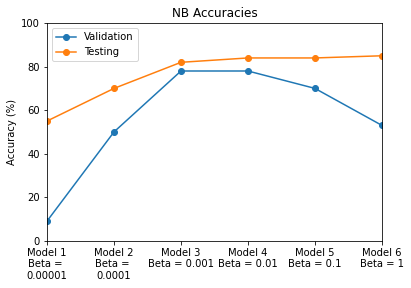

In [ ]:
# create x and y data
x1 = [1, 2, 3, 4, 5, 6]
y1 = [9, 50, 78, 78, 70, 53]

# create x and y data for second line
x2 = [1, 2, 3, 4, 5, 6]
y2 = [55, 70, 82, 84, 84, 85]

# create plot
plt.plot(x1, y1, label='Validation', marker='o')
plt.plot(x2, y2, label='Testing', marker='o')

# set plot title and axis labels
plt.title('NB Accuracies')
plt.ylabel('Accuracy (%)')

# set axis limits
plt.xlim(1, 6)
plt.ylim(0, 100)
plt.xticks(x1, ['Model 1\nBeta = \n0.00001', 'Model 2\nBeta = \n0.0001', 'Model 3\nBeta = 0.001', 'Model 4\nBeta = 0.01', 'Model 5\nBeta = 0.1', 'Model 6\nBeta = 1'])

# add legend
plt.legend()
# plt.savefig('filename.png', dpi=300)

# show plot
plt.show()

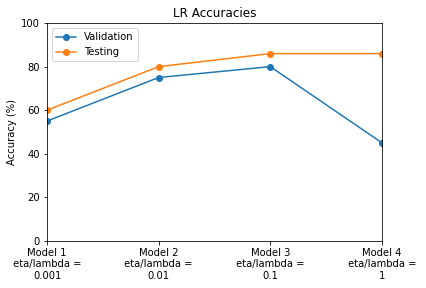

In [ ]:
# create x and y data
x1 = [1, 2, 3, 4]
y1 = [55, 75, 80, 45]

# create x and y data for second line
x2 = [1, 2, 3, 4]
y2 = [60, 80, 86, 86]

# create plot
plt.plot(x1, y1, label='Validation', marker='o')
plt.plot(x2, y2, label='Testing', marker='o')

# set plot title and axis labels
plt.title('LR Accuracies')
plt.ylabel('Accuracy (%)')

# set axis limits
plt.xlim(1, 4)
plt.ylim(0, 100)
plt.xticks(x1, ['Model 1\n eta/lambda = \n0.001', 'Model 2\n eta/lambda = \n0.01', 'Model 3\n eta/lambda = \n0.1', 'Model 4\n eta/lambda = \n1'])

# add legend
plt.legend()
# plt.savefig('filename.png', dpi=300)

# show plot
plt.show()

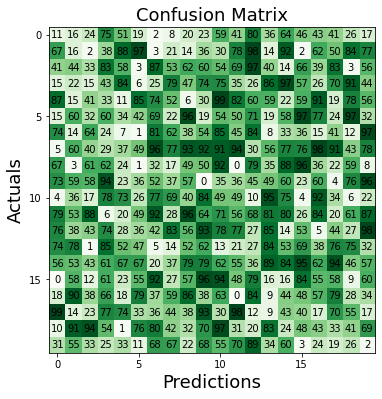

# Model 3: Logistic Regression Classifier

## References:
* https://realpython.com/logistic-regression-python/
* https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
* https://www.w3schools.com/python/python_ml_logistic_regression.asp
* https://www.geeksforgeeks.org/ml-logistic-regression-using-python/
* https://www.analyticsvidhya.com/blog/2022/02/implementing-logistic-regression-from-scratch-using-python/
* https://www.udemy.com/course/data-science-logistic-regression-in-python/
* https://medium.com/codex/machine-learning-logistic-regression-with-python-5ed4ded9d146
* https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Logistic%20Regression%20in%20Python%20-%20Step%20by%20Step.ipynb
* https://levelup.gitconnected.com/learn-logistic-regression-for-classification-with-python-10-practical-examples-f7f6119bebf9
* https://www.dataquest.io/blog/logistic-regression-in-python/



## Attempt 1

In [ ]:
from scipy.special import softmax
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()

In [ ]:
def loss(X, Y, W):
    # print("In loss function")
    # print("X shape:", X.shape)
    # print("W shape:", W.shape)
    Z = - X.dot(W)
    N = X.shape[0]
    # onehot_encoder = OneHotEncoder()
    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1, 1))
    # print("Y_onehot shape:", Y_onehot.shape)
    loss = 1/N * (np.trace(X.dot(W).dot(Y_onehot.T)) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

In [ ]:
def gradient(X, Y_onehot, W, mu):
  # print("X shape:", X.shape)
  # print("Y_onehot shape:", Y_onehot.shape)
  # print("W shape:", W.shape)
  Z = X @ W
  P = softmax(Z, axis=1)
  # print("P shape:", P.shape)
  N = X.shape[0]
  Y_onehot = np.expand_dims(Y_onehot, axis=-1)
  gd = 1/N * (X.T @ (Y_onehot - P)) + 2 * mu * W
  # print("Gradient shape:", gd.shape)
  return gd

In [ ]:
def gradient_descent(X, Y, max_iter=1000, eta=0.1, mu=0.01):
  Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
  W = np.zeros((X.shape[1], Y_onehot.shape[1]))
  step = 0
  step_lst = []
  loss_lst = []
  W_lst = []

  while step < max_iter:
    step += 1
    W -= eta * gradient(X, Y, W, mu)
    step_lst.append(step)
    W_lst.append(W)
    loss_lst.append(loss(X, Y, W))

  df = pd.DataFrame({
      'step': step_lst,
      'loss': loss_lst
  })
  return df, W

In [ ]:
class Multiclass:
  def fit(self, X, Y):
    self.loss_steps, self.W = gradient_descent(X, Y)
    
  def loss_plot(self):
    return self.loss_steps.plot(
        x='step',
        y='loss',
        xlabel='step',
        ylabel='loss'
    )

  def predict(self, H):
    Z = - H @ self.W
    P = softmax(Z, axis=1)
    return np.argmax(P, axis=1)

In [ ]:
df_trainLOG = df_trainSMALL.copy()

In [ ]:
df_trainLOG.head(1510)

1  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.61069  0.61070  \
0        2  0    0    0    0    0    0    0    0    0  ...        0        0   
1        3  0    0    0    0    0    0    0    0    0  ...        0        0   
2        4  0    0    0    0    0    0    0    0    0  ...        0        0   
3        5  0    0    0    0    0    0    0    0    0  ...        0        0   
4        6  0    0    0    0    0    0    0    0    0  ...        0        0   
...    ... ..  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...      ...   
1494  1496  0    0    0    0    0    0    0    0    0  ...        0        0   
1495  1497  0    0    0    0    0    0    0    0    0  ...        0        0   
1496  1498  0    0    0    0    0    0    0    0    0  ...        0        0   
1497  1499  0    0    0    0    0    0    0    0    0  ...        0        0   
1498  1500  0    0    0    0    0    0    0    0    0  ...        0        0   

      0.61071  0.61072  0.61073  0.61074  0.61075  0.61076  0.61077  14  
0           0        0        0        0        0        0        0  16  
1           0        0        0        0        0        0        0   8  
2           0        0        0        0        0        0        0  11  
3           0        0        0        0        0        0        0  12  
4           0        0        0        0        0        0        0   7  
...       ...      ...      ...      ...      ...      ...      ...  ..  
1494        0        0        0        0        0        0        0  11  
1495        0        0        0        0        0        0        0   1  
1496        0        0        0        0        0        0        0   8  
1497        0        0        0        0        0        0        0  17  
1498        0        0        0        0        0        0        0   6  

[1499 rows x 61190 columns]

In [ ]:
df_trainLOG = df_trainLOG.drop(columns=['1', '14'])

In [ ]:
df_trainLOG.head(1500)

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.61068  0.61069  \
0     0    0    0    0    0    0    0    0    0    0  ...        0        0   
1     0    0    0    0    0    0    0    0    0    0  ...        0        0   
2     0    0    0    0    0    0    0    0    0    0  ...        0        0   
3     0    0    0    0    0    0    0    0    0    0  ...        0        0   
4     0    0    0    0    0    0    0    0    0    0  ...        0        0   
...  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...      ...   
1494  0    0    0    0    0    0    0    0    0    0  ...        0        0   
1495  0    0    0    0    0    0    0    0    0    1  ...        0        0   
1496  0    0    0    0    0    0    0    0    0    0  ...        0        0   
1497  0    0    0    0    0    0    0    0    0    0  ...        0        0   
1498  0    0    0    0    0    0    0    0    0    0  ...        0        0   

      0.61070  0.61071  0.61072  0.61073  0.61074  0.61075  0.61076  0.61077  
0           0        0        0        0        0        0        0        0  
1           0        0        0        0        0        0        0        0  
2           0        0        0        0        0        0        0        0  
3           0        0        0        0        0        0        0        0  
4           0        0        0        0        0        0        0        0  
...       ...      ...      ...      ...      ...      ...      ...      ...  
1494        0        0        0        0        0        0        0        0  
1495        0        0        0        0        0        0        0        0  
1496        0        0        0        0        0        0        0        0  
1497        0        0        0        0        0        0        0        0  
1498        0        0        0        0        0        0        0        0  

[1499 rows x 61188 columns]

In [ ]:
train_nump = df_trainLOG.to_numpy()
print(train_nump[1498])

[0 0 0 ... 0 0 0]


In [ ]:
len(train_nump)

1499

In [ ]:
all_classes = df_trainSMALL['14'].unique()
print(all_classes)
print(len(all_classes))

[16  8 11 12  7 15  6  5  4  1  2 17  3 19  9 14 13 10 20 18]
20


In [ ]:
all_trainClass = df_trainSMALL['14'].to_numpy()

In [ ]:
print(all_trainClass)
print(len(all_trainClass))

[16  8 11 ...  8 17  6]
1499


In [ ]:
print(all_trainClass[1498])
print(train_nump[1498])

6
[0 0 0 ... 0 0 0]


In [ ]:
print(len(all_trainClass))
print(len(train_nump))

1499
1499


In [ ]:
X = np.random.rand(100, 5)
print(X)

[[0.47611389 0.35474522 0.81331792 0.49278523 0.86414313]
 [0.62288957 0.19890959 0.06064659 0.2196076  0.86520413]
 [0.09199105 0.68964979 0.8677288  0.36939022 0.77105775]
 [0.18964184 0.18953418 0.81664142 0.37870663 0.93922627]
 [0.93944924 0.40088069 0.70208863 0.24153171 0.7237112 ]
 [0.81662845 0.72887009 0.30565148 0.91754224 0.46137275]
 [0.39680834 0.70469207 0.07527048 0.74567468 0.64924191]
 [0.82401598 0.70588391 0.38092139 0.781616   0.57507178]
 [0.42311726 0.56026787 0.44521454 0.91219591 0.91901434]
 [0.83442988 0.73200766 0.8047891  0.34321388 0.32756906]
 [0.65181488 0.90235507 0.1328611  0.16176804 0.5991891 ]
 [0.49625844 0.20239615 0.54706417 0.21984766 0.09216256]
 [0.94188356 0.18597654 0.05786225 0.20432691 0.96917559]
 [0.42382563 0.18111023 0.69950036 0.68657563 0.47218678]
 [0.07783949 0.26235229 0.47827342 0.83434428 0.32958611]
 [0.69128973 0.75397124 0.20253255 0.64363249 0.00629017]
 [0.52869012 0.10666012 0.75837403 0.69569541 0.50992235]
 [0.55251222 0

In [ ]:
Y = np.random.randint(0, 3, size=100)
print(Y)

[2 1 1 0 2 2 1 0 2 2 2 1 1 0 1 2 0 0 2 0 2 0 2 2 1 1 0 0 2 0 1 1 1 1 0 1 0
 2 1 0 2 2 2 0 0 2 2 1 0 2 0 0 2 1 1 2 2 1 0 2 2 0 2 2 0 0 0 1 0 2 0 1 0 0
 1 0 1 0 0 1 1 2 0 1 1 1 2 1 1 1 2 1 2 2 1 0 0 0 1 1]


In [ ]:
print(train_nump)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
logModel = Multiclass()
logModel.fit(X, Y)

NotImplementedError: ignored

In [ ]:
X_test = np.random.rand(20, 5)

In [ ]:
# Make predictions on test data X_test
predictions = logModel.predict(X_test)

In [ ]:
# Print the predictions
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Attempt 2

In [ ]:
class LogReg:
    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
    def fit(self, X, y):
        self.num_classes = np.max(y) + 1  # set num_classes based on actual number of classes
        self.num_features = X.shape[1]
        self.weights = np.zeros((self.num_classes, self.num_features))
        self.bias = np.zeros(self.num_classes)
        y_encoded = self.one_hot_encoding(y)

        for i in range(self.num_iterations):
            z = np.dot(X, self.weights.T) + self.bias
            y_pred = softmax(z)

            loss = cross_entropy_loss(y_encoded, y_pred)
            print("Iteration {}: Loss = {:.4f}".format(i, loss))

            error = y_pred - y_encoded
            grad_w = np.dot(error.T, X) / X.shape[0]
            grad_b = np.mean(error, axis=0)

            self.weights -= self.learning_rate * grad_w
            self.bias -= self.learning_rate * grad_b
    
    def predict(self, X):
        z = np.dot(X, self.weights.T) + self.bias
        y_pred = softmax(z)
        return np.argmax(y_pred, axis=1)
    
    def one_hot_encoding(self, y):
        y_encoded = np.zeros((len(y), self.num_classes))
        print(len(y))
        for i in range(len(y)):
            
            y_encoded[i, y[i]] = 1
        return y_encoded

    def cross_entropy_loss(y_encoded, y_pred):
        N = y_encoded.shape[0]
        loss = -np.sum(y_encoded * np.log(y_pred)) / N
        return loss

### Accuracy test run

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Testing out model with some simplier data sets
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogReg()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

120
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

In [ ]:
X_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

In [ ]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
print(len(X_train))
print(len(y_train))

120
120


### Train and test model

In [ ]:
df_trainLOG = df_trainSMALL.copy()  

In [ ]:
df_trainLOG = df_trainLOG.drop(columns=['1', '14'])

In [ ]:
df_testLOG = df_testSMALL.copy()

In [ ]:
df_testLOG = df_testLOG.drop(columns=['12001'])

In [ ]:
train_nump = df_trainLOG.to_numpy()

In [ ]:
test_nump = df_testLOG.to_numpy()

In [ ]:
print(train_nump[1498])

[0 0 0 ... 0 0 0]


In [ ]:
train_nump

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
test_nump

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
len(train_nump)

1499

In [ ]:
all_classes = df_trainSMALL['14'].unique()
print(all_classes)
print(len(all_classes))

[16  8 11 12  7 15  6  5  4  1  2 17  3 19  9 14 13 10 20 18]
20


In [ ]:
all_trainClass = df_trainSMALL['14'].to_numpy()

In [ ]:
all_trainClass

array([16,  8, 11, ...,  8, 17,  6])

In [ ]:
print(all_trainClass)
print(len(all_trainClass))

[16  8 11 ...  8 17  6]
1499


In [ ]:
print(all_trainClass[1498])
print(train_nump[1498])

6
[0 0 0 ... 0 0 0]


In [ ]:
print(len(all_trainClass))
print(len(train_nump))

1499
1499


In [ ]:
np_model = LogReg()

In [ ]:
np_model.fit(train_nump, all_trainClass)

1499
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

In [ ]:
np_model.weights

array([[-0.0002061 , -0.00399596, -0.00066805, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00525435,  0.01518588,  0.10787346, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00145334, -0.01269314, -0.00612355, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.00110272,  0.00011125, -0.00918717, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00132457,  0.00752386, -0.00975843, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00188256, -0.00082729,  0.00438732, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
np_model.weights[0]

array([-0.0002061 , -0.00399596, -0.00066805, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
np.save('LRweights_4.npy', np_model.weights)
files.download('LRweights_4.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Use the model to make predictions on the testing set
y_pred = np_model.predict(test_nump)

In [ ]:
print(len(test_nump))

499


In [ ]:
print(y_pred)

[ 7  4 16  7 17 14 17 15  5 10 15  9 14  8  1 17  5  2 15 14  1 16  8  8
 15 13 15  3  5  8  6 11  7 13  6 10  3 16  4  7 17  7 11 11 13 13  7 13
  4 18  1 19 10 15  4 13 18 20  9 12  4  1 14 11  7 13 14  1  5  7 11  5
 19 16  5 20 15 17  4  3 19 13 10 18  8  5  8  8  9 13 10 11  5 10 16 17
 13  4 10 19  9 12  1  6  7 12 17 13 16  7 16 10  1  7 14 13 10  1 14 11
  7 12 12 14 14 20 11 13  4  6  8  5 15 14  9  6 11 12 18  7 12  8  9  8
  7  3 13  7  8  3 14  6  8 16  8 19 15 15  4  7  9  9 19  9  8 18 15  7
  4 10 11 16 12  6 17  4 16 19  9  6  9  1 18  1 14 10  2 12  1 13 18 12
 10 11  7 12  4 18 18 15 17  3  7 15 15 14 12 17 13  8  8 14  8 18  4  7
 11  3  5  9 19 17 17  8  8 19  8 19 10 12 19 13 15  8  8  6 18 14 14 14
  1 19 13  6  2 18 16 16  7 12 10 16  7 15 12  4 14 13  3 16  3 11 13  3
  7 10 19  6  2  8 11 12 17 18 12  2  8  9 16 13 13  6 13 12 17  7  6  1
  6 12  1  3  4  7  7  8 12 14  4 18  6 17 19  9  3 14 13 14  2  5 12 12
 11  6  4 19 11 20  4  3 13 18  4  8 16 10 13  3 14

## Validation

In [ ]:
actual_valid =  list(df_validFULL['9'])

In [ ]:
actual_valid

[3,
 15,
 12,
 10,
 20,
 7,
 3,
 6,
 18,
 7,
 9,
 13,
 3,
 14,
 17,
 7,
 8,
 18,
 18,
 10,
 13,
 2,
 3,
 11,
 4,
 3,
 6,
 4,
 9,
 10,
 19,
 9,
 12,
 18,
 10,
 16,
 15,
 8,
 1,
 12,
 14,
 14,
 17,
 1,
 12,
 19,
 17,
 7,
 13,
 8,
 9,
 14,
 15,
 15,
 14,
 8,
 2,
 17,
 10,
 2,
 6,
 9,
 3,
 5,
 7,
 4,
 9,
 10,
 6,
 2,
 1,
 17,
 14,
 8,
 7,
 7,
 9,
 8,
 11,
 8,
 5,
 4,
 1,
 17,
 4,
 10,
 4,
 8,
 3,
 9,
 8,
 2,
 19,
 16,
 1,
 14,
 13,
 2,
 4,
 14,
 14,
 20,
 13,
 15,
 14,
 7,
 8,
 2,
 15,
 18,
 1,
 11,
 17,
 15,
 12,
 18,
 6,
 11,
 10,
 17,
 6,
 3,
 13,
 12,
 10,
 15,
 6,
 17,
 4,
 18,
 11,
 3,
 16,
 15,
 3,
 7,
 10,
 10,
 13,
 9,
 16,
 20,
 3,
 10,
 14,
 15,
 9,
 18,
 16,
 10,
 11,
 20,
 12,
 3,
 13,
 15,
 1,
 8,
 12,
 6,
 1,
 2,
 1,
 13,
 14,
 9,
 4,
 9,
 20,
 10,
 11,
 6,
 6,
 8,
 3,
 9,
 9,
 8,
 1,
 16,
 8,
 2,
 9,
 3,
 13,
 14,
 18,
 4,
 5,
 20,
 13,
 11,
 19,
 15,
 2,
 20,
 8,
 18,
 1,
 1,
 15,
 17,
 14,
 1,
 10,
 6,
 4,
 5,
 10,
 9,
 5,
 9,
 12,
 1,
 2,
 4,
 4,
 16,
 8,
 12,
 17,
 19,


In [ ]:
# Load the model from the file
nb = joblib.load('nb_model.pkl')

In [ ]:
X_test = valid_nump

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
print("Naive Bayes predicts:", y_pred_nb)

Naive Bayes predicts: [ 6 15 12 10 20 13  3  6 18  7  9 13 11 14 17  7  8 18 18 10 13 18  4 11
  4  3  6  5  9 10 17  8 12 18 10 16 15  8 20 12 14 14  8  1 12 19 17  7
 13  8  9 14 15 15 14  8  2 17 10  2  6  9 12  5  9  4  8 11  6  2  1 17
 14  8  4  7  8  6 11 17  3  4  1 17  3 10  3  8  3  9  8 20 19 16  1 14
 13  2  4 14 14 20 13 15 14  7  9  2 15 18  1 11 11 15 12 18  6 11 10 17
  6  3 15 12 10 15  6 17 13 18 11  5 16 15  5  3 10 10 13  9 16 20  4 10
 14 17  9 18 16 10 11 20 12  2 13 15  1  8 12  3  1  5  1  7 14  9  7  9
 20 10 11  6  6  2  3  9  9  2 16 16  8  2  9  4 13 14 13  2  5 20 13 11
 17 15  2  1  8 18  1  1 15 17 14  1 10  6  3  5 10  9  5  9 12  1  2  4
  7 16 18 12 17 17  9 15  5 15  7  3  6 20 13  9 16 15 16 16 13  4  9  2
 11 14 14 11 19  9 13 16 14  9 17  4  9 20  6 16 12 20 13 17 11  5  5  4
  8 17 18  4 16 11 18 11  4 20  4 14 10  8  8  9  9 18 15 15 11 17  9 11
 13 10 10  3  9  6 14  9 15 11  4 11 12  2 18  7 20 10  9  5 16  6 18 15
  9  5 16  2 17 12 15  9 17 1

In [ ]:
correct_nb = (y_pred_nb == actual_valid)
accuracy_nb = correct_nb.sum() / correct_nb.size

In [ ]:
print(accuracy_nb)

0.7827827827827828


# Most important features (mutual information)

## References:
* http://www.sefidian.com/2017/06/14/mutual-information-mi-and-entropy-implementations-in-python/
* https://towardsdatascience.com/select-features-for-machine-learning-model-with-mutual-information-534fe387d5c8
* https://stackoverflow.com/questions/20491028/optimal-way-to-compute-pairwise-mutual-information-using-numpy

In [ ]:
# Estimate H(X) for each instance
def entropy(p):
    p = p[np.nonzero(p)]  # remove zero probabilities
    H = -np.sum(p * np.log2(p))
    return H

In [ ]:
# Estimate I(X) given then H(X) or instance and target class
def mutual_info(x, y, bins=10):
    hist_xy, _, _ = np.histogram2d(x, y, bins=bins)
    p_x = np.histogram(x, bins=bins)[0] / x.size
    p_y = np.histogram(y, bins=bins)[0] / y.size
    H_x = entropy(p_x)
    H_y = entropy(p_y)
    p_xy = hist_xy / np.sum(hist_xy)
    H_xy = entropy(p_xy)
    MI_xy = H_x + H_y - H_xy
    return MI_xy

In [18]:
mut_infoScore = mutual_info(train_nump, train_classes)
print(mut_infoScore)

[1.0131452  1.29257511 0.1262421  ... 0.81010862 1.78464644 0.69683754]


In [13]:
sortedALL = ['adg',
 'amdahl',
 'alomar',
 'cryptanalysts',
 'mitteilungsblatt',
 'xfor',
 'adsp',
 'atheism',
 'athos',
 'sportstalk',
 'azerbaijanians',
 'tettleton',
 'memmedov',
 'motorcyclists',
 'bontchev',
 'bruins',
 'nba',
 'canadiens',
 'albicans',
 'cardinals',
 'deciphering',
 'christianity',
 'ttttttttttttttt',
 'countersteering',
 'cousineau',
 'powerusersgroupchairman',
 'cryptography',
 'cryptographic',
 'denning',
 'dineen',
 'srcsignature',
 'xdpyinfo',
 'autopsies',
 'firearm',
 'fprintf',
 'gregmeister',
 'god',
 'gfci',
 'goaltender',
 'goalie',
 'blackhawks',
 'escherichia',
 'suprafaxmodem',
 'homicides',
 'maciisi',
 'imakefile',
 'infante',
 'inning',
 'ioccc',
 'mmmmmmmmmm',
 'nordiques',
 'karabakh',
 'konfessionslosesn',
 'nctams',
 'leafs',
 'lemieux',
 'libxmu',
 'excalibur',
 'kovalev',
 'turgeon',
 'moncton',
 'mutants',
 'mydisplay',
 'nhl',
 'nsmca',
 'obfuscated',
 'obp',
 'oilers',
 'oname',
 'orbiter',
 'pitcher',
 'prometheus',
 'plaintext',
 'potvin',
 'powerbook',
 'punisher',
 'ranck',
 'rayshade',
 'rbi',
 'recchi',
 'ripem',
 'rlk',
 'rsa',
 'unverzagt',
 'sandberg',
 'sdpa',
 'serdar',
 'soderstrom',
 'ssto',
 'stderr',
 'stephanopoulos',
 'stepanakert',
 'uccxkvb',
 'zrepachol',
 'whalers',
 'wip',
 'jjrj',
 'zeitlin',
 'xfree',
 'acsddc']

In [14]:
sortedALL = sorted(sortedALL)

In [15]:
sortedALL

['acsddc',
 'adg',
 'adsp',
 'albicans',
 'alomar',
 'amdahl',
 'atheism',
 'athos',
 'autopsies',
 'azerbaijanians',
 'blackhawks',
 'bontchev',
 'bruins',
 'canadiens',
 'cardinals',
 'christianity',
 'countersteering',
 'cousineau',
 'cryptanalysts',
 'cryptographic',
 'cryptography',
 'deciphering',
 'denning',
 'dineen',
 'escherichia',
 'excalibur',
 'firearm',
 'fprintf',
 'gfci',
 'goalie',
 'goaltender',
 'god',
 'gregmeister',
 'homicides',
 'imakefile',
 'infante',
 'inning',
 'ioccc',
 'jjrj',
 'karabakh',
 'konfessionslosesn',
 'kovalev',
 'leafs',
 'lemieux',
 'libxmu',
 'maciisi',
 'memmedov',
 'mitteilungsblatt',
 'mmmmmmmmmm',
 'moncton',
 'motorcyclists',
 'mutants',
 'mydisplay',
 'nba',
 'nctams',
 'nhl',
 'nordiques',
 'nsmca',
 'obfuscated',
 'obp',
 'oilers',
 'oname',
 'orbiter',
 'pitcher',
 'plaintext',
 'potvin',
 'powerbook',
 'powerusersgroupchairman',
 'prometheus',
 'punisher',
 'ranck',
 'rayshade',
 'rbi',
 'recchi',
 'ripem',
 'rlk',
 'rsa',
 'sandberg

In [10]:
sorted_vocab = sorted(all_vocab)

In [11]:
sorted_vocab

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg',
 'aaaaagggghhhh',
 'aaaarrgghhhh',
 'aaaggghhh',
 'aaah',
 'aaahhhh',
 'aaai',
 'aaainnt',
 'aab',
 'aachen',
 'aad',
 'aah',
 'aaj',
 'aam',
 'aamir',
 'aammmaaaazzzzzziinnnnggggg',
 'aamrl',
 'aan',
 'aanerud',
 'aantal',
 'aao',
 'aaoepp',
 'aap',
 'aaplay',
 'aardvark',
 'aargh',
 'aarhus',
 'aario',
 'aarnet',
 'aaron',
 'aaronc',
 'aaroundpluto',
 'aarp',
 'aas',
 'aatchoo',
 'aau',
 'aauwpiugyv',
 'aawin',
 'aazaadee',
 'ab',
 'aba',
 'ababa',
 'ababs',
 'abacus',
 'abad',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandons',
 'abate',
 'abatement',
 'abba',
 'abbas',
 'abbasids',
 'abbasov',
 'abberation',
 'abbey',
 'abbot',
 'abbott',
 'abbreviation',
 'abbreviations',
 'abc',
 'abcd',
 'abcdef',
 'abcdefghijklmnopqrstuvwxyz',
 'abd',
 'abdallah',
 'abdel',
 'abdi',
 'abdkw',
 'abdomen',
 'abdominal',
 'abduct',
 'abducted',
 'abduction',
 'abd